# Introduction

### The Bernstein-Vazirani problem
The Bernstein-Vazirani algorithm deals with finding a hidden integer $c \in \{0,1\}^n$ from a function $f_c$ that we'll call the $Oracle$. 

The $Oracle$ can be considered as a $Black$ $Box$, and it's function is  $$f\{0,1\}^n --> \{0,1\}$$ 

And we are $promised$ that $f(x)$ $=$ $\ \ c\ . \ x  \ ( mod 2)$   $ \ \ $ and the problem is to find $c$. ($promized$ means that: Toutes function ne satisfont pas cette condition)
- In other words, the function returns $f_c(x) = c \cdot x \mod 2$ given an input $x \in \{0,1\}^n$
Here below the diagram of the $Oracle$ 
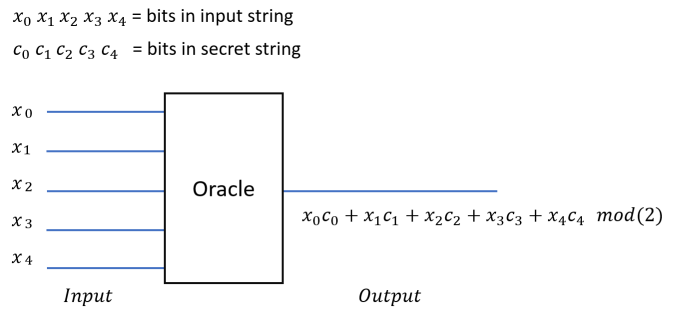

Classically, the hidden integer $c$ can be revealed by querying the $oracle$ function with $x = 1, 2, \ldots, 2^i, \ldots, 2^{n-1}$, where each query reveals the $i$-th bit of $c$ (or, $c_i$). For example, with $x=1$ one can obtain the least significant bit of $c$, and so on. 

To solve this with classical computing, we must use n entries where n is the number of bits in the secret string. For each input, the bits are all 0’s except for a single 1 at a location n. For example, the first input for a five-bit problem will be [1, 0 , 0 , 0, 0], the second would be [0, 1, 0 , 0, 0] etc.

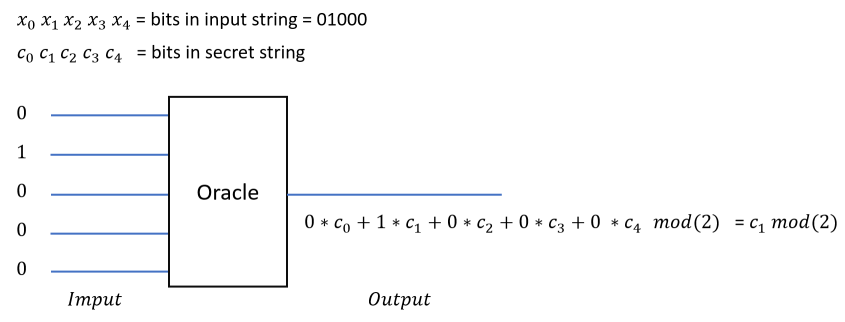
If your inner product $modulo$ $2$ is $0$, the secret bit at location $n$ is $0$, if it's $1$, the secret bit is $1$. We, therefore, need $n$ entries, $1$ to find out each bit in the secret string.

So classically, you could get an answer one bit at a time by querying all the strings of Hamming weight one: 
- $f(00001) =  c_0$ 
- $f(00010) =  c_1$ 
- $f(00100) =  c_2$
- $f(01000) =  c_3$ 
- $f(10000) =  c_4$ 

This turns out to be an optimal strategy; any classical algorithm that finds the hidden integer with high probability must query the oracle $\Omega(n)$ times. However, given a corresponding quantum oracle, the hidden integer can be found with only $1$ query using the Bernstein-Vazirani algorithm. 



# The Quantum Algorithm 

https://arxiv.org/abs/quant-ph/0012114
https://www.pnas.org/content/114/13/3305.full

Meanwhile, a quantum oracle behaves similarly but can be queried with superposition of input $x$'s. The algorithm finds the unknown bit string $c$ in a singleshot.


- Starts from a |0⟩ state, 
- Apply Hadamard gates, 
- Query the oracle, 
- Apply Hadamard gates,
- And measure. 

$$\frac{1}{\sqrt{2^n}} \sum_{x\epsilon \{0,1\}} (-1)^{s \cdot x} |x\rangle = \frac{|0\rangle + (-1)^{s_1}|1\rangle}{\sqrt{2}} \bigotimes \dots \bigotimes  \frac{|0\rangle + (-1)^{s_n}|1\rangle}{\sqrt{2}}%0$$


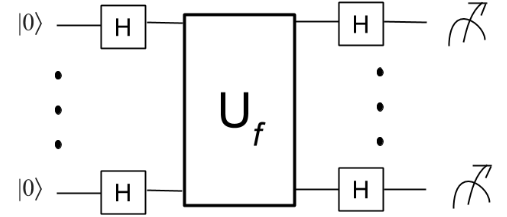


### Using Z gates
- In the oracle, $c$ can be encoded in a pattern of $Z$ gates
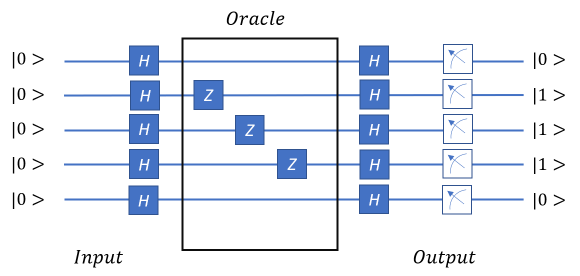


### Using CNOT gates
- $c$ can also be encoded in a pattern of $CNOT$ gates, all of which target the ancilla qubit. 
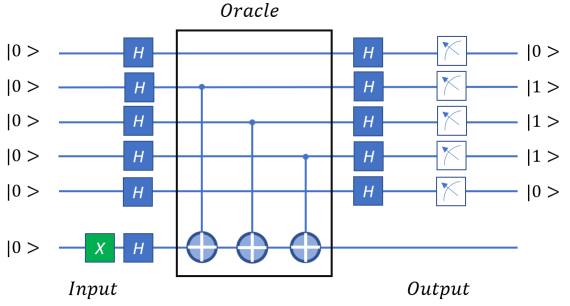



- When using $CNOT$ gates for the Oracle, It is as if the control qubits were flipped instead of the other qubits.......This is named the "phase kickback"
    
   - Let's see in detail how this works with that little circuit.
   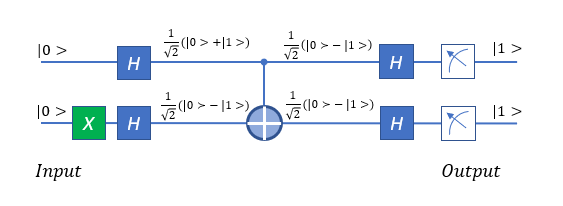
   
   - After having passed the 2 first Hadamards gates the status is: $(|0> + |1>)(|0> -|1>)$ 
           - We can write (|0> + |1>)(|0> - |1>) = (|00> - |01> + |10> -|11>)       
       
   - Then the CNOT gate flips the second bits: $(|00> - |01> - |10> +|11>)$  
           - We can write (|00> - |01> - |10> +|11>) = (|0> - |1>)(|0> - |1>) 
       
   - The final Hadamard gates change $(|0> - |1>)$ to $|1>$ 


In [14]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.10.0',
 'qiskit-aer': '0.3.2',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.3.3',
 'qiskit-aqua': '0.6.1',
 'qiskit': '0.13.0'}

In [15]:
from qiskit import *
from utils import *
%matplotlib inline 
#%matplotlib notebook
from qiskit.tools.visualization import plot_histogram, plot_state_city
import matplotlib.pyplot as plt

In [16]:
secret_number = '11'

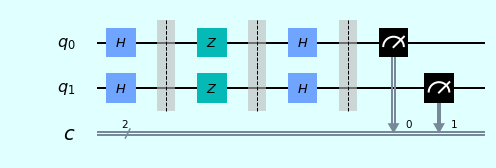

In [17]:
bv_circuit_not_entengled = QuantumCircuit(len(secret_number),len(secret_number))

# Add Hadamards to all Qubits
for i in range(len(bv_circuit_not_entengled.qregs[0])):    
    bv_circuit_not_entengled.h([i])
bv_circuit_not_entengled.barrier()

# Oracle definition (from secret number)
for i, j in enumerate(secret_number):
    if j=='1':
        bv_circuit_not_entengled.z(i)
bv_circuit_not_entengled.barrier()

# add Hadamards
for i in range(len(bv_circuit_not_entengled.qregs[0])):    
    bv_circuit_not_entengled.h([i])
bv_circuit_not_entengled.barrier()


# add measure
for i in range(len(bv_circuit_not_entengled.qregs[0])): 
    bv_circuit_not_entengled.measure([i],[i])
    
# draw the circuit
style = {'backgroundcolor': 'lightcyan'}
bv_circuit_not_entengled.draw(output='mpl', style=style)

## Circuit Execution using Qasm simulator

In [18]:
simulator = Aer.get_backend('qasm_simulator')
job = execute (bv_circuit_not_entengled, backend=simulator, shots=1)
result = job.result()
counts = result.get_counts()
print(counts)

{'11': 1}


#  Let's play by entering a secret number

In [19]:
# ask for the number to discover
answer = input("Enter the secret number : ")
x = int(answer.strip().lower())
print("The binary value is : " , decimalToBinary(x))



Enter the secret number : 365
The binary value is :  101101101


In [20]:
binaryToDecimal(decimalToBinary(x))

365

CX gate to be set to qubits : 0 2
CX gate to be set to qubits : 2 2
CX gate to be set to qubits : 3 2
CX gate to be set to qubits : 5 2
CX gate to be set to qubits : 6 2
CX gate to be set to qubits : 8 2


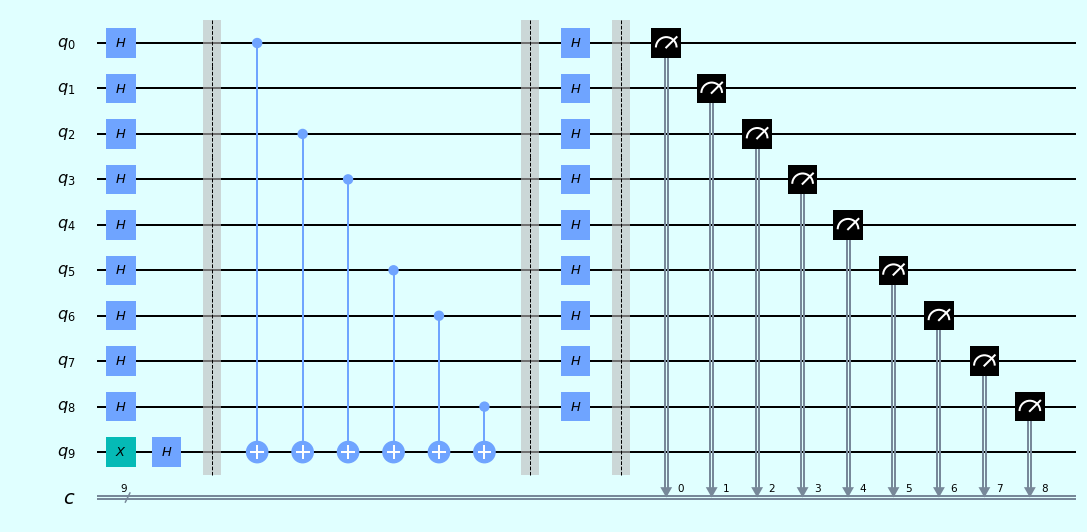

In [21]:
# Oracle settings

number_to_discover = decimalToBinary(x)

circuit = QuantumCircuit(len(number_to_discover)+1, len(number_to_discover))

# add H to circuit and X to Oracle Qubit
circuit.h(range(len(number_to_discover)))
circuit.x(len(number_to_discover))
circuit.h(len(number_to_discover))
circuit.barrier()


for i, j in enumerate(reversed(number_to_discover)):
    if j == '1' :
        print ('CX gate to be set to qubits :' ,i , len(secret_number) )
        circuit.cx(i,len(number_to_discover))  
circuit.barrier()

# add H to circuit 
circuit.h(range(len(number_to_discover)))
circuit.barrier()
# Add measure
circuit.measure(range(len(number_to_discover)),range(len(number_to_discover)))

# Change the background color in mpl
style = {'backgroundcolor': 'lightcyan'}
circuit.draw(output='mpl', style = style)


In [22]:
simulator = Aer.get_backend('qasm_simulator')
job = execute (circuit, backend=simulator, shots=1024)
result = job.result()
value = list(result.get_counts())
print("The secret number was : ", binaryToDecimal(value[0]))

The secret number was :  365


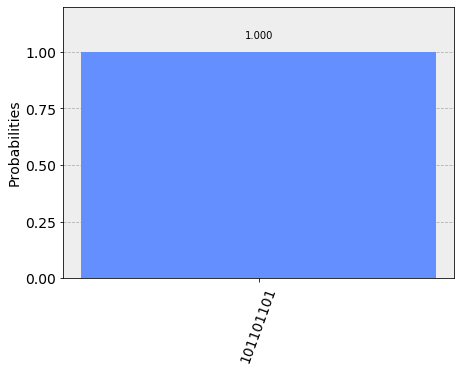

In [23]:
plot_histogram(result.get_counts())

In [ ]:
# using Aqua for Bernstein-Vazirani 
from qiskit.aqua import run_algorithm
from qiskit.aqua.algorithms import BernsteinVazirani

# Create the BernsteinVazirani circuit
bv = BernsteinVazirani(oracle)